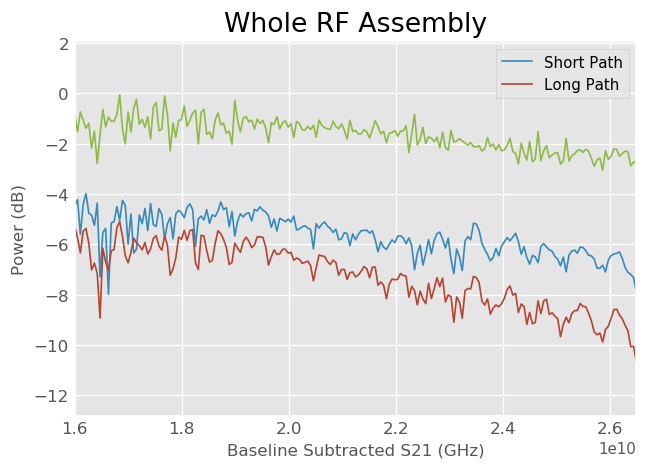

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pylab
import skrf as rf
import math 
rf.stylely()
# from skrf.data import ring_slot
short = rf.data.wr2p2_short
delayshort = rf.data.wr2p2_delayshort

A = short - delayshort 



IN = rf.Network('IN.s2p')

OUT = rf.Network('OUT.s2p')

IN_s12 = IN.s_db[:,1,0]
OUT_s12 = OUT.s_db[:,1,0]

L_M = -np.abs(IN.s_db[:,1,0]-OUT.s_db[:,1,0])

L_T = 10*np.log10(1/2*(np.power(10,L_M/10)+1))

plt.figure(2)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Baseline Subtracted S21 (GHz)', fontsize = 10)
plt.ylabel('Power (dB)', fontsize = 10)
plt.title("RF Asymmetry Test")

plt.plot(IN.f,IN_s12)
plt.plot(OUT.f,OUT_s12)
plt.plot(IN.f,L_M)
plt.gca().legend(('Short Path', 'Long Path','Subtracted'))
plt.savefig('sample.pdf')
plt.show()

In [1]:
# =============================================================================
# Keysight Field Fox VNA/SA/PM reading  
# Jonathan Tedeschi 10/17/18
# =============================================================================


import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#%%
# =============================================================================
# VNA File Reading & Plotting
# =============================================================================
file_path="/home/drewbyron/Jupyter Notebooks/6HE CRES/RF/"

file_names=glob.glob(file_path+'HE6-WHOLE-CATASTROPHE.s2p')

organized_files=np.sort(file_names)

VNA_trace_name=[]
data=[]
for f in range(len(organized_files)):
    #data.append(pd.read_csv(organized_files[f],skiprows=2).values)
    data.append(pd.read_csv(organized_files[f],sep='\t',skiprows=13).values)
    VNA_trace_name.append(organized_files[f][len(file_path):len(organized_files[f])-4])
    
for f in range(len(organized_files)):
    plt.figure(figsize=(8,8))
    plt.plot(data[f][:,0]/1e9,data[f][:,1],label='S11')
    plt.plot(data[f][:,0]/1e9,data[f][:,3],label='S21')
    plt.plot(data[f][:,0]/1e9,data[f][:,7],label='S22')
    plt.xlabel('GHz',fontsize=16)
    plt.ylabel('dB',fontsize=16)
    plt.title(VNA_trace_name[f],fontsize=16)
    plt.legend(loc='best',fontsize=12)
    plt.grid()
    plt.savefig(file_path+VNA_trace_name[f]+'.png')
#%%
# =============================================================================
# Spectrum Analyzer File Reading and Plotting
# =============================================================================

file_path="./"

file_names=glob.glob(file_path+'*.csv')

organized_files=np.sort(file_names)

SA_trace_name=[]
SA_data=[]
for f in range(len(organized_files)):
    #data.append(pd.read_csv(organized_files[f],skiprows=2).values)
    SA_data.append(pd.read_csv(organized_files[f],sep=',',skiprows=21,skipfooter=1).values)
    SA_trace_name.append(file_names[f][len(file_path):len(file_names[f])-4])
    
for f in range(len(organized_files)):
    plt.figure(figsize=(8,8))
    plt.plot(SA_data[f][:,0]/1e9,SA_data[f][:,1],label='Trace 1')
    #plt.plot(data[f][:,0]/1e9,data[f][:,2],label='Trace 2')
    #plt.plot(data[f][:,0]/1e9,data[f][:,3],label='Trace 3')
    plt.xlabel('GHz',fontsize=16)
    plt.ylabel('dBm',fontsize=16)
    plt.title(SA_trace_name[f],fontsize=16)
    plt.legend(loc='best',fontsize=12)
    plt.grid()
    plt.savefig(file_path+SA_trace_name[f]+'.png')

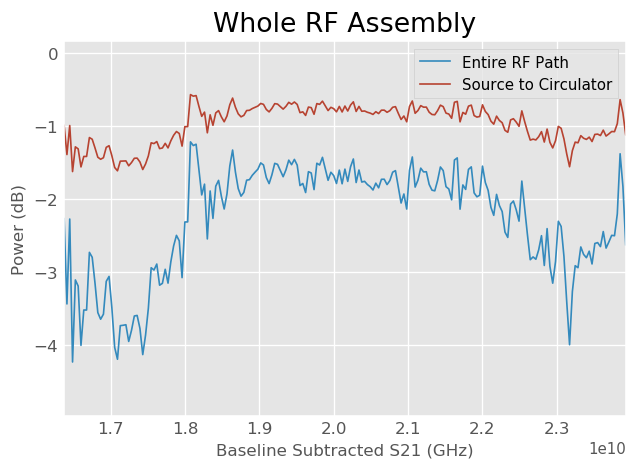

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pylab
import skrf as rf
import math 
rf.stylely()
# from skrf.data import ring_slot
short = rf.data.wr2p2_short
delayshort = rf.data.wr2p2_delayshort

A = short - delayshort 



baseline = rf.Network('HE6-BASELINE2.s2p')

everything = rf.Network('HE6-WHOLE-CATASTROPHE.s2p')



L_M = -np.abs(everything.s_db[:,1,0]-baseline.s_db[:,1,0])

L_T = 10*np.log10(1/2*(np.power(10,L_M/10)+1))



# print(np.log10(1/2(np.power(L_M/10,10)+1)))

# print(np.log10(1/2*(np.power(L_M/10,10)+1)))




# plt.figure(1)
# # short.plot_s_db()
# # delayshort.plot_s_db()
# # A.plot_s_db()
# # baseline.plot_s_db()
# # everything.plot_s_db(m=1, n=0)
# # subtracted.plot_s_db()
# # print(everything.s[1,1,0]- baseline.s[1,1,0])
# # print(subtracted.s[1,1,0])
# plt.show()


plt.figure(2)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Baseline Subtracted S21 (GHz)', fontsize = 10)
plt.ylabel('Power (dB)', fontsize = 10)
plt.title("Whole RF Assembly")

plt.plot(everything.f,L_M)
plt.plot(everything.f,L_T)
plt.gca().legend(('Entire RF Path', 'Source to Circulator'))
plt.savefig('sample.pdf')
plt.show()